In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from onebatch import one_batch_greedy_kmedoids
from data_loaders import load_data


matplotlib.rc('axes',linewidth=2)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
dataset = "mnist"

X, _ = load_data(dataset, 0, None)

A = []
for seed in range(10):
    print(seed)
    np.random.seed(seed)
    results = one_batch_greedy_kmedoids(X, K=100,  batch_size=1000, verbose=0, sparse_ratio=True)

    ratio = np.array([1.] + results["ratio"])
    col_ratio = np.array([1.] + results["col_ratio"])
    med_ratio = np.array([1.] + results["med_ratio"])

    A.append(np.transpose((ratio, col_ratio, med_ratio)))

A = np.stack(A, -1)

0
1
2
3
4
5
6
7
8
9


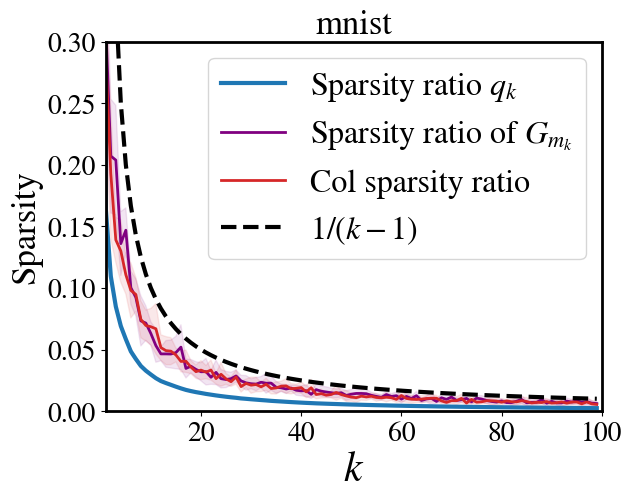

In [6]:
ratio = A[:,0].mean(-1)
col_ratio = A[:,1].mean(-1)
med_ratio = A[:,2].mean(-1)

ratio_std = A[:,0].std(-1)
col_ratio_std = A[:,1].std(-1)
med_ratio_std = A[:,2].std(-1)

Ks = np.arange(0, 100)
inv_Ks = np.clip(1./np.clip(Ks, 1e-8, np.inf), 0, 1)
plt.plot(Ks, ratio, lw=3., label=r"Sparsity ratio $q_k$")
plt.fill_between(Ks, ratio-1*ratio_std, ratio+1*ratio_std, alpha=0.2)

plt.plot(Ks, med_ratio, c="purple", lw=2., label=r"Sparsity ratio of $G_{m_k}$")
plt.fill_between(Ks, med_ratio-1*med_ratio_std, med_ratio+1*med_ratio_std, color="purple", alpha=0.1)

plt.plot(Ks, col_ratio, c="C3", lw=2., label=r"Col sparsity ratio")
plt.fill_between(Ks, col_ratio-1*col_ratio_std, col_ratio+1*col_ratio_std, alpha=0.1, color="C3")

plt.plot(Ks, inv_Ks, "--", c="k", lw=3., label=r"$1/(k-1)$")

plt.ylim(0, 0.3)
plt.xlim(1, 100)
plt.legend(fontsize=23, loc="upper right")

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"Sparsity", fontsize=25)

plt.title("%s"%dataset, fontsize=25)
plt.show()